## Step 1. Importing data

In [64]:
# read_csv function

import os
import pandas as pd
folder_name = 'Fibrazo'
dir = r'C:\Users\mcaba\OneDrive\Escritorio\Data Science\Company test\Company-test\{}'.format(folder_name)

def read_csv_fun(folder_name,file_name, path):
    path = dir
    os.chdir(path)
    df = pd.read_csv('{}.csv'.format(file_name), sep=',', low_memory=False, on_bad_lines='skip')
    return df

df_clients = read_csv_fun('Fibrazo','clients', dir)
print(df_clients.head(5))

      id  gaiia_id         status gaiia_status          City          name  \
0  54213   57771.0  Instalaciones       ACTIVE  Barranquilla  SANTODOMINGO   
1  69104   71312.0  Instalaciones       ACTIVE  Barranquilla      CARRIZAL   
2  16311   24969.0  Instalaciones    SUSPENDED     Cartagena    VILLA ROSA   
3  68472   70721.0  Instalaciones       ACTIVE  Barranquilla   SANTA MARIA   
4  15285   24147.0  Instalaciones       ACTIVE     Cartagena    VILLA ROSA   

                created_at  
0  2025-01-14 12:10:45.000  
1  2025-03-12 17:00:00.000  
2  2024-06-06 14:51:15.000  
3  2025-03-10 17:00:00.000  
4  2024-05-27 21:21:40.000  


In [65]:
df_client_journey = read_csv_fun('Fibrazo','client_journey', dir)
print(df_client_journey.head(5))

df_invoices = read_csv_fun('Fibrazo','invoices', dir)
print(df_invoices.head(5))

   gaiia_id                     date          status
0     15332  2023-07-31 05:24:36.783       SUSPENDED
1     17155  2023-07-31 05:24:37.897  SUSPENDED-LEAD
2     16629  2023-07-31 05:24:38.540  SUSPENDED-LEAD
3     16987  2023-07-31 05:24:39.609       SUSPENDED
4     16609  2023-07-31 05:24:40.071       SUSPENDED
      id               created_at  client_id payment_gateway
0  14183  2024-05-01 00:04:24.000       5688           NEQUI
1  14190  2024-05-01 00:07:08.000       8628           NEQUI
2  14180  2024-05-01 00:13:57.000      11289     SUPER_GIROS
3  14184  2024-05-01 00:24:50.000       6757     SUPER_GIROS
4  14185  2024-05-01 00:26:05.000       7607     SUPER_GIROS


## Step 2. Glimpse on the data

In [66]:
display(
    df_clients.head(5)
)

display(
    print(df_clients.isna().sum())
    )

display(
    print(len(df_clients))
    )

display(
    df_clients.info()
)

display(
    df_clients.value_counts("status")
)

display(
    df_clients.value_counts("gaiia_status")
)

display(
    df_clients.value_counts("City")
)

# we have 1 missing gaiia_id on the dataframe
# some columns need to be converted to other Data type for analysis. Ej: created_at      


,id,gaiia_id,status,gaiia_status,City,name,created_at
0,54213,57771.0,Instalaciones,ACTIVE,Barranquilla,SANTODOMINGO,2025-01-14 12:10:45.000
1,69104,71312.0,Instalaciones,ACTIVE,Barranquilla,CARRIZAL,2025-03-12 17:00:00.000
2,16311,24969.0,Instalaciones,SUSPENDED,Cartagena,VILLA ROSA,2024-06-06 14:51:15.000
3,68472,70721.0,Instalaciones,ACTIVE,Barranquilla,SANTA MARIA,2025-03-10 17:00:00.000
4,15285,24147.0,Instalaciones,ACTIVE,Cartagena,VILLA ROSA,2024-05-27 21:21:40.000


id              0
gaiia_id        1
status          0
gaiia_status    0
City            0
name            0
created_at      0
dtype: int64


None

48591


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48591 entries, 0 to 48590
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            48591 non-null  int64  
 1   gaiia_id      48590 non-null  float64
 2   status        48591 non-null  object 
 3   gaiia_status  48591 non-null  object 
 4   City          48591 non-null  object 
 5   name          48591 non-null  object 
 6   created_at    48591 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.6+ MB


None

status
Instalaciones    48298
Ventas             293
dtype: int64

gaiia_status
ACTIVE       30012
SUSPENDED    12109
INACTIVE      6118
PENDING        352
dtype: int64

City
Cartagena       36771
Barranquilla    11820
dtype: int64

In [67]:
## Is id a primary key?

df_clients = df_clients.sort_values(by="id", ascending=True)

# Check 1: Uniqueness of `id`
is_unique = df_clients["id"].is_unique
print(f"Is `id` unique? {is_unique}")

# Check 2: Non-Null Values in `id`
has_nulls = df_clients["id"].isnull().any()
print(f"Does `id` have null values? {has_nulls}")

# Check 3: Incremental Values in `id`
is_incremental = df_clients["id"].is_monotonic_increasing
print(f"Is `id` incremental? {is_incremental}")

# Check for Duplicates in `id`
duplicates = df_clients[df_clients.duplicated("id", keep=False)]
if not duplicates.empty:
    print("\nDuplicate `id` values found:")
    display(duplicates)
else:
    print("\nNo duplicate `id` values found.")

Is `id` unique? True
Does `id` have null values? False
Is `id` incremental? True

No duplicate `id` values found.


In [68]:
display(
    df_client_journey.head(5)
)

display(
    print(df_client_journey.isna().sum())
    )

display(
    print(len(df_client_journey))
    )

display(
    df_client_journey.info()
)

display(
    df_client_journey.value_counts("status")
)

# some columns need to be converted to other Data type for analysis. Ej: date
# Staus column seems to have more information than df_clients[status]


,gaiia_id,date,status
0,15332,2023-07-31 05:24:36.783,SUSPENDED
1,17155,2023-07-31 05:24:37.897,SUSPENDED-LEAD
2,16629,2023-07-31 05:24:38.540,SUSPENDED-LEAD
3,16987,2023-07-31 05:24:39.609,SUSPENDED
4,16609,2023-07-31 05:24:40.071,SUSPENDED


gaiia_id    0
date        0
status      0
dtype: int64


None

796867


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796867 entries, 0 to 796866
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   gaiia_id  796867 non-null  int64 
 1   date      796867 non-null  object
 2   status    796867 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.2+ MB


None

status
ACTIVE            397111
SUSPENDED         374609
TRIAL               8608
SUSPENDED-LEAD      5884
INACTIVE            4458
INACTIVE-LEAD       4030
PENDING             2166
LEAD                   1
dtype: int64

In [69]:
## Is gaiia_id a primary key?

df_client_journey = df_client_journey.sort_values(by="gaiia_id", ascending=True)

# Check 1: Uniqueness of `gaiia_id`
is_unique = df_client_journey["gaiia_id"].is_unique
print(f"Is `gaiia_id` unique? {is_unique}")

# Check 2: Non-Null Values in `gaiia_id`
has_nulls = df_client_journey["gaiia_id"].isnull().any()
print(f"Does `gaiia_id` have null values? {has_nulls}")

# Check 3: Incremental Values in `gaiia_id`
is_incremental = df_client_journey["gaiia_id"].is_monotonic_increasing
print(f"Is `gaiia_id` incremental? {is_incremental}")

# Check for Duplicates in `gaiia_id`
duplicates = df_client_journey[df_client_journey.duplicated("gaiia_id", keep=False)]
if not duplicates.empty:
    print("\nDuplicate `gaiia_id` values found:")
    display(duplicates)
else:
    print("\nNo duplicate `gaiia_id` values found.")

Is `gaiia_id` unique? False
Does `gaiia_id` have null values? False
Is `gaiia_id` incremental? True

Duplicate `gaiia_id` values found:


,gaiia_id,date,status
44883,15001,2024-02-14 14:46:12.312,ACTIVE
23425,15001,2023-11-27 17:20:09.776,SUSPENDED
15065,15001,2023-10-18 22:24:50.994,SUSPENDED
132370,15001,2024-07-17 19:52:49.736,SUSPENDED
132372,15001,2024-07-17 19:54:54.227,ACTIVE
...,...,...,...
796711,67743,2025-03-14 06:04:00.047,SUSPENDED-LEAD
796771,67748,2025-03-14 06:04:21.842,SUSPENDED-LEAD
751361,67748,2025-02-26 20:11:30.845,TRIAL
751507,67846,2025-02-26 21:01:42.388,TRIAL


In [70]:
display(
    df_invoices.head(5)
)

display(
    print(df_invoices.isna().sum())
    )

display(
    print(len(df_invoices))
    )

display(
    df_invoices.info()
)

display(
    df_invoices.value_counts("payment_gateway")
)

# some columns need to be converted to other Data type for analysis. Ej: created_at

,id,created_at,client_id,payment_gateway
0,14183,2024-05-01 00:04:24.000,5688,NEQUI
1,14190,2024-05-01 00:07:08.000,8628,NEQUI
2,14180,2024-05-01 00:13:57.000,11289,SUPER_GIROS
3,14184,2024-05-01 00:24:50.000,6757,SUPER_GIROS
4,14185,2024-05-01 00:26:05.000,7607,SUPER_GIROS


id                 0
created_at         0
client_id          0
payment_gateway    0
dtype: int64


None

424464


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424464 entries, 0 to 424463
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               424464 non-null  int64 
 1   created_at       424464 non-null  object
 2   client_id        424464 non-null  int64 
 3   payment_gateway  424464 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.0+ MB


None

payment_gateway
NEQUI                    397146
SUPER_GIROS               22355
MERCADO_PAGO_TRANSFER      2726
GIFT                       1949
PAYVALIDA_TRANSFER          288
dtype: int64

In [71]:
## Is id a primary key?

df_invoices = df_invoices.sort_values(by="id", ascending=True)

# Check 1: Uniqueness of `id`
is_unique = df_invoices["id"].is_unique
print(f"Is `id` unique? {is_unique}")

# Check 2: Non-Null Values in `id`
has_nulls = df_invoices["id"].isnull().any()
print(f"Does `id` have null values? {has_nulls}")

# Check 3: Incremental Values in `id`
is_incremental = df_invoices["id"].is_monotonic_increasing
print(f"Is `id` incremental? {is_incremental}")

# Check for Duplicates in `id`
duplicates = df_invoices[df_invoices.duplicated("id", keep=False)]
if not duplicates.empty:
    print("\nDuplicate `id` values found:")
    display(duplicates)
else:
    print("\nNo duplicate `id` values found.")

Is `id` unique? True
Does `id` have null values? False
Is `id` incremental? True

No duplicate `id` values found.


## Step 3. Cleaning Data

In [72]:
#Dropping missing values
threshold = len(df_clients) * 0.05
print(threshold)

cols_to_drop = df_clients.columns[df_clients.isna().sum() <= threshold]
print(cols_to_drop)

df_clients.dropna(subset=cols_to_drop, inplace=True)

#Seems to be just one register, and without this field, 
# it is not possible to perform all the intended joins, 
# the goal is to find trends in the data, 
# so it is convenient to drop the only missing one

2429.55
Index(['id', 'gaiia_id', 'status', 'gaiia_status', 'City', 'name',
       'created_at'],
      dtype='object')


In [73]:
display(
    print(df_clients.isna().sum())
    )

display(
    print(len(df_clients))
    )

id              0
gaiia_id        0
status          0
gaiia_status    0
City            0
name            0
created_at      0
dtype: int64


None

48590


None

In [74]:
#Transforming data columns into the correct Dtype to be able to perform date-time analysis

df_clients["created_at"] = pd.to_datetime(df_clients["created_at"])

df_client_journey["date"] = pd.to_datetime(df_client_journey["date"])

df_invoices["created_at"] = pd.to_datetime(df_invoices["created_at"])

In [75]:
display(
    df_clients.info()
)

display(
    df_client_journey.info()
)

display(
    df_invoices.info()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48590 entries, 42832 to 2280
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            48590 non-null  int64         
 1   gaiia_id      48590 non-null  float64       
 2   status        48590 non-null  object        
 3   gaiia_status  48590 non-null  object        
 4   City          48590 non-null  object        
 5   name          48590 non-null  object        
 6   created_at    48590 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 3.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796867 entries, 44883 to 794440
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   gaiia_id  796867 non-null  int64         
 1   date      796867 non-null  datetime64[ns]
 2   status    796867 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 24.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424464 entries, 888 to 424463
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               424464 non-null  int64         
 1   created_at       424464 non-null  datetime64[ns]
 2   client_id        424464 non-null  int64         
 3   payment_gateway  424464 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 16.2+ MB


None

In [76]:
min_date = df_clients["created_at"].min()
max_date = df_clients["created_at"].max()
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

df_clients["year"] = df_clients["created_at"].dt.year

display(
    df_clients.value_counts("year")
)

# we seem to have two records with time outlyers
# records make sense to be between 2023-2025
# 1996 and 1964 are way back before company creation, this is inconsistent data

Minimum Date: 1964-07-20 10:50:09
Maximum Date: 2025-03-13 22:40:11


year
2024    32249
2025    12009
2023     4330
1964        1
1996        1
dtype: int64

In [77]:
min_date = df_client_journey["date"].min()
max_date = df_client_journey["date"].max()
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

df_client_journey["year"] = df_client_journey["date"].dt.year

display(
    df_client_journey.value_counts("year")
)

# records make sense to be between 2023-2025

Minimum Date: 2023-07-31 05:24:36.783000
Maximum Date: 2025-03-14 06:06:59.163000


year
2024    460823
2025    304603
2023     31441
dtype: int64

In [78]:
min_date = df_invoices["created_at"].min()
max_date = df_invoices["created_at"].max()
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

df_invoices["year"] = df_invoices["created_at"].dt.year

display(
    df_invoices.value_counts("year")
)

# records are available between 2024-2025 this may limit our scope of analysis
# to provide a clear trend using payment_gateway info

Minimum Date: 2024-05-01 00:04:24
Maximum Date: 2025-03-14 15:35:06


year
2024    227619
2025    196845
dtype: int64

In [79]:
# On this case the most reasonable thing to do is to drop inconsistent date data
# but just for this case I'm going to imput inconsistet data base on the group(name)

# imputting inconsistent date data
outliers = df_clients[df_clients["created_at"].dt.year.isin([1996, 1964])]
print(outliers)


         id  gaiia_id         status gaiia_status       City  \
38938  4794   16910.0  Instalaciones     INACTIVE  Cartagena   
39631  5634   17750.0  Instalaciones     INACTIVE  Cartagena   

                   name          created_at  year  
38938  UB NUEVA VENECIA 1996-11-28 16:34:09  1996  
39631     LA CANDELARIA 1964-07-20 10:50:09  1964  


In [84]:
specific_group_sorted = df_clients[
     (df_clients["name"] == "UB NUEVA VENECIA")]

# Validate that `id` and `created_at` are in ascending order
is_id_ascending = specific_group_sorted["id"].is_monotonic_increasing
is_created_at_ascending = specific_group_sorted["created_at"].is_monotonic_increasing

print(f"Is `id` in ascending order? {is_id_ascending}")
print(f"Is `created_at` in ascending order? {is_created_at_ascending}")

print(specific_group_sorted.size)


Is `id` in ascending order? True
Is `created_at` in ascending order? False
2312


In [89]:
# Validate which rows in `created_at` are not in ascending order
specific_group_sorted["is_ascending"] = specific_group_sorted["created_at"].diff() >= pd.Timedelta(0)

# Identify rows where `created_at` is not in ascending order
non_ascending_rows = specific_group_sorted[specific_group_sorted["is_ascending"] == False]

# Display the rows where `created_at` is not in ascending order
print("Rows where `created_at` is not in ascending order:")
display(non_ascending_rows)

# `created_at` does not seem to be consistently increasing along with the id value,
#  however, these exceptions are only 0.1% of the sample

Rows where `created_at` is not in ascending order:


C:\Users\mcaba\AppData\Local\Temp\ipykernel_27320\1495104431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_group_sorted["is_ascending"] = specific_group_sorted["created_at"].diff() >= pd.Timedelta(0)


,id,gaiia_id,status,gaiia_status,City,name,created_at,year,is_ascending
44931,4204,16290.0,Instalaciones,ACTIVE,Cartagena,UB NUEVA VENECIA,2023-05-16 12:33:05,2023,False
27545,4394,16494.0,Instalaciones,ACTIVE,Cartagena,UB NUEVA VENECIA,2023-05-27 00:00:00,2023,False
22457,5896,17984.0,Instalaciones,INACTIVE,Cartagena,UB NUEVA VENECIA,2023-08-17 11:20:07,2023,False


In [85]:
non_ascending_rows = non_ascending_rows[non_ascending_rows["created_at"].dt.year == 1996]

# Forward-fill `created_at` with a midpoint date for the problematic rows
for index, row in non_ascending_rows.iterrows():
    # Get the `id` before and after the problematic row
    prev_row = specific_group_sorted[specific_group_sorted["id"] < row["id"]].iloc[-1]  # Row before
    next_row = specific_group_sorted[specific_group_sorted["id"] > row["id"]].iloc[0]   # Row after

    # Calculate the midpoint date (excluding time)
    midpoint_date = prev_row["created_at"] + (next_row["created_at"] - prev_row["created_at"]) / 2
    midpoint_date = midpoint_date.normalize()  # Remove time component

    # Forward-fill the `created_at` column with the midpoint date
    specific_group_sorted.at[index, "created_at"] = midpoint_date

# Display the updated DataFrame
print("Updated DataFrame:")
print(specific_group_sorted.head(14))

# now the outlyers is imput with a new datetime value between rows: 
# the value imputed is 2023-06-29 00:00:00.000 

Updated DataFrame:
         id  gaiia_id         status gaiia_status       City  \
44931  4204   16290.0  Instalaciones       ACTIVE  Cartagena   
5887   4263   16362.0         Ventas      PENDING  Cartagena   
5970   4317   16412.0  Instalaciones     INACTIVE  Cartagena   
19868  4384   16483.0  Instalaciones    SUSPENDED  Cartagena   
27545  4394   16494.0  Instalaciones       ACTIVE  Cartagena   
6062   4401   16499.0  Instalaciones     INACTIVE  Cartagena   
38858  4694   16818.0  Instalaciones     INACTIVE  Cartagena   
38859  4695   16820.0  Instalaciones     INACTIVE  Cartagena   
38938  4794   16910.0  Instalaciones     INACTIVE  Cartagena   
39008  4932   16986.0  Instalaciones     INACTIVE  Cartagena   
39137  5105   17151.0  Instalaciones     INACTIVE  Cartagena   
39233  5203   17271.0  Instalaciones       ACTIVE  Cartagena   
39332  5307   17395.0  Instalaciones     INACTIVE  Cartagena   
39531  5525   17618.0  Instalaciones     INACTIVE  Cartagena   

                   n

In [ ]:
# now there is the process to imput '1964' date value
specific_group_1964 = df_clients[
     (df_clients["name"] == "LA CANDELARIA")]

specific_group_1964["is_ascending"] = specific_group_1964["created_at"].diff() >= pd.Timedelta(0)


non_ascending_1964 = specific_group_1964[specific_group_1964["is_ascending"] == False]
non_ascending_1964 = non_ascending_1964[non_ascending_1964["created_at"].dt.year == 1964]

for index, row in non_ascending_1964.iterrows():
    
    prev_row = specific_group_1964[specific_group_1964["id"] < row["id"]].iloc[-1]  # Row before
    next_row = specific_group_1964[specific_group_1964["id"] > row["id"]].iloc[0]   # Row after

    midpoint_date = prev_row["created_at"] + (next_row["created_at"] - prev_row["created_at"]) / 2
    midpoint_date = midpoint_date.normalize() 

    specific_group_1964.at[index, "created_at"] = midpoint_date

# Display the updated DataFrame
print("Updated DataFrame:")
display(specific_group_1964[specific_group_1964["year"] == 1964])
# now the outlyers is imput with a new datetime value between rows: 
# the value imputed is 2023-06-29 00:00:00.000 


Updated DataFrame:


C:\Users\mcaba\AppData\Local\Temp\ipykernel_27320\3895623171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_group_1964["is_ascending"] = specific_group_1964["created_at"].diff() >= pd.Timedelta(0)


,id,gaiia_id,status,gaiia_status,City,name,created_at,year,is_ascending
39631,5634,17750.0,Instalaciones,INACTIVE,Cartagena,LA CANDELARIA,2023-08-09,1964,False


In [ ]:
#now it is time to update impute date values in our dataframe

# Update df_clients with the corrected `created_at` values from specific_group_sorted
df_clients.update(specific_group_sorted["created_at"])
df_clients.update(specific_group_1964["created_at"])

# Display the updated df_clients DataFrame
print("Updated df_clients:")
display(df_clients[df_clients["year"].isin([1964, 1996])])

# clean year column
df_clients["year"] = df_clients["created_at"].dt.year
display(
    df_clients.value_counts("year")
)

Updated df_clients:


,id,gaiia_id,status,gaiia_status,City,name,created_at,year
38938,4794,16910.0,Instalaciones,INACTIVE,Cartagena,UB NUEVA VENECIA,2023-06-29,1996
39631,5634,17750.0,Instalaciones,INACTIVE,Cartagena,LA CANDELARIA,2023-08-09,1964


year
2024    32249
2025    12009
2023     4332
dtype: int64

Step 4. Create new columns and joins for data

In [102]:
df_clients["year"] = df_clients["created_at"].dt.year
df_clients["month"] = df_clients["created_at"].dt.month
df_clients["weekday"] = df_clients["created_at"].dt.weekday

df_clients["week_number"] = df_clients["created_at"].dt.isocalendar().week

# Create 'year_week' column by concatenating year and week number
df_clients["year_week"] = df_clients["year"].astype(str) + "_" + df_clients["week_number"].astype(str)

display(
    df_clients.info()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48590 entries, 42832 to 2280
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            48590 non-null  int64         
 1   gaiia_id      48590 non-null  float64       
 2   status        48590 non-null  object        
 3   gaiia_status  48590 non-null  object        
 4   City          48590 non-null  object        
 5   name          48590 non-null  object        
 6   created_at    48590 non-null  datetime64[ns]
 7   year          48590 non-null  int64         
 8   month         48590 non-null  int64         
 9   weekday       48590 non-null  int64         
 10  week_number   48590 non-null  UInt32        
 11  year_week     48590 non-null  object        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 4.7+ MB


None

In [109]:
# Perform inner join on gaiia_id (df_clients + df_client_journey)
df_merged = pd.merge(
    df_clients,
    df_client_journey,
    on="gaiia_id",
    how="inner",
    suffixes=("_client", "_journey")
)
# Display the merged DataFrame
display(df_merged.head(2))

,id,gaiia_id,status_client,gaiia_status,City,name,created_at,year_client,month,weekday,week_number,year_week,date,status_journey,year_journey
0,84,15103.0,Instalaciones,ACTIVE,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,2023-03-02 15:35:24,2023,3,3,9,2023_9,2024-06-04 13:19:13.952,ACTIVE,2024
1,84,15103.0,Instalaciones,ACTIVE,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,2023-03-02 15:35:24,2023,3,3,9,2023_9,2024-03-26 15:03:58.924,SUSPENDED,2024


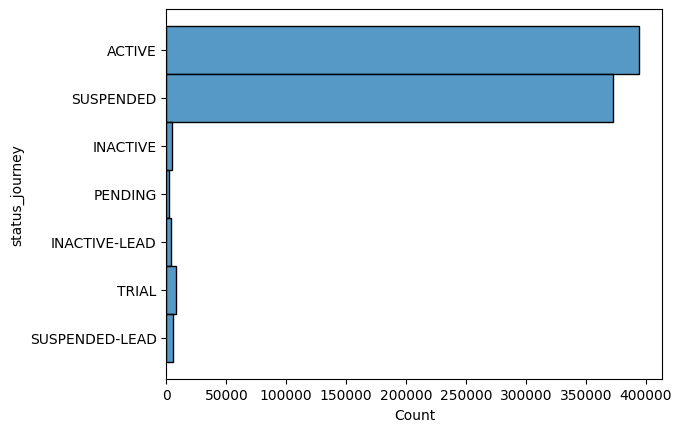

In [114]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=df_merged, y="status_journey", binwidth=1)
plt.show()

Step 3. Analyze categorical data


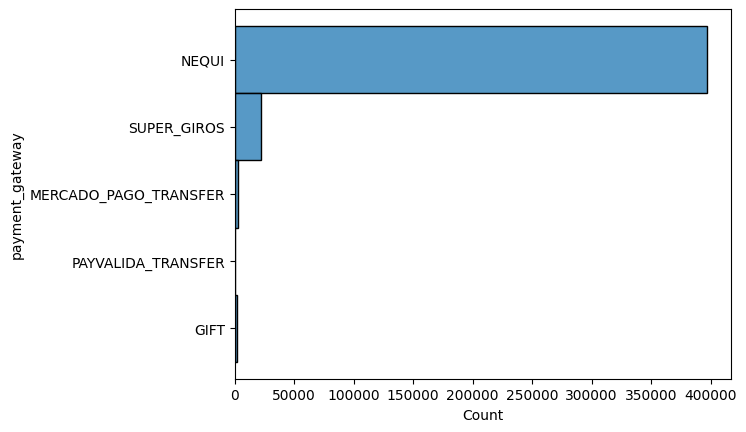

In [13]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=df_invoices, y="payment_gateway", binwidth=1)
plt.show()

In [14]:
# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=df_invoices, x="2021", y="continent")
plt.show()

ValueError: Could not interpret input '2021'